# Task 1: Data Extraction and Initial Analysis

In [1]:
!gdown 1ew0FmC5VQTRKWslWoNn8XL5PzSSHl_SP

Downloading...
From: https://drive.google.com/uc?id=1ew0FmC5VQTRKWslWoNn8XL5PzSSHl_SP
To: /content/10-K.csv
100% 976/976 [00:00<00:00, 2.67MB/s]


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('10-K.csv')
df.head()

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow
0,Microsoft,2023,"211,915,000,000","72,361,000,000","411,976,000,000","205,753,000,000","87,582,000,000"
1,Microsoft,2022,"198,270,000,000","72,738,000,000","364,840,000,000","198,298,000,000","89,035,000,000"
2,Microsoft,2021,"168,088,000,000","61,271,000,000","333,779,000,000","191,791,000,000","76,740,000,000"
3,Tesla,2023,"96,773,000,000","14,974,000,000","106,618,000,000","43,009,000,000","13,256,000,000"
4,Tesla,2022,"81,462,000,000","12,587,000,000","82,338,000,000","36,440,000,000","14,724,000,000"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company            9 non-null      object
 1   Year               9 non-null      int64 
 2   Total Revenue      9 non-null      object
 3   Net Income         9 non-null      object
 4   Total Assets       9 non-null      object
 5   Total Liabilities  9 non-null      object
 6   Cash Flow          9 non-null      object
dtypes: int64(1), object(6)
memory usage: 632.0+ bytes


In [5]:
def remove_commas(value):
    value = value.split(',')
    value = ''.join(value)
    return int(value)

In [6]:
for col in df.columns:
    if col not in ["Company", "Year"]:
        df[col] = df[col].map(remove_commas)

In [7]:
df.head()

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow
0,Microsoft,2023,211915000000,72361000000,411976000000,205753000000,87582000000
1,Microsoft,2022,198270000000,72738000000,364840000000,198298000000,89035000000
2,Microsoft,2021,168088000000,61271000000,333779000000,191791000000,76740000000
3,Tesla,2023,96773000000,14974000000,106618000000,43009000000,13256000000
4,Tesla,2022,81462000000,12587000000,82338000000,36440000000,14724000000


In [9]:
df['Revenue Growth (%)'] = df.groupby(['Company'])['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby(['Company'])['Net Income'].pct_change() * 100

In [12]:
df

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow,Revenue Growth (%),Net Income Growth (%)
0,Microsoft,2023,211915000000,72361000000,411976000000,205753000000,87582000000,NaN,NaN
1,Microsoft,2022,198270000000,72738000000,364840000000,198298000000,89035000000,-6.438902,0.520999
2,Microsoft,2021,168088000000,61271000000,333779000000,191791000000,76740000000,-15.222676,-15.764800
3,Tesla,2023,96773000000,14974000000,106618000000,43009000000,13256000000,NaN,NaN
4,Tesla,2022,81462000000,12587000000,82338000000,36440000000,14724000000,-15.821562,-15.940964
5,Tesla,2021,53823000000,5644000000,62131000000,30548000000,11497000000,-33.928703,-55.160086
6,Apple,2023,383285000000,96995000000,352583000000,290437000000,110543000000,NaN,NaN
7,Apple,2022,394328000000,99803000000,352755000000,302083000000,122151000000,2.881146,2.894995
8,Apple,2021,365817000000,94680000000,351022000000,287912000000,104038000000,-7.230275,-5.133112


In [19]:
# Fill NA values that result from pct_change calculations with 0 or an appropriate value
df.fillna(0, inplace=True)

In [20]:
df

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow,Revenue Growth (%),Net Income Growth (%)
0,Microsoft,2023,211915000000,72361000000,411976000000,205753000000,87582000000,0.000000,0.000000
1,Microsoft,2022,198270000000,72738000000,364840000000,198298000000,89035000000,-6.438902,0.520999
2,Microsoft,2021,168088000000,61271000000,333779000000,191791000000,76740000000,-15.222676,-15.764800
3,Tesla,2023,96773000000,14974000000,106618000000,43009000000,13256000000,0.000000,0.000000
4,Tesla,2022,81462000000,12587000000,82338000000,36440000000,14724000000,-15.821562,-15.940964
5,Tesla,2021,53823000000,5644000000,62131000000,30548000000,11497000000,-33.928703,-55.160086
6,Apple,2023,383285000000,96995000000,352583000000,290437000000,110543000000,0.000000,0.000000
7,Apple,2022,394328000000,99803000000,352755000000,302083000000,122151000000,2.881146,2.894995
8,Apple,2021,365817000000,94680000000,351022000000,287912000000,104038000000,-7.230275,-5.133112


In [23]:
# Optionally, you could summarize these findings for each company
summary = df.groupby('Company').agg({
    'Revenue Growth (%)': 'mean',
    'Net Income Growth (%)': 'mean'
}).reset_index()

print("\nYear-over-Year Average Growth Rates (%):")
summary


Year-over-Year Average Growth Rates (%):


,Company,Revenue Growth (%),Net Income Growth (%)
0,Apple,-1.449710,-0.746039
1,Microsoft,-7.220526,-5.081267
2,Tesla,-16.583422,-23.700350


In [24]:
import matplotlib.pyplot as plt

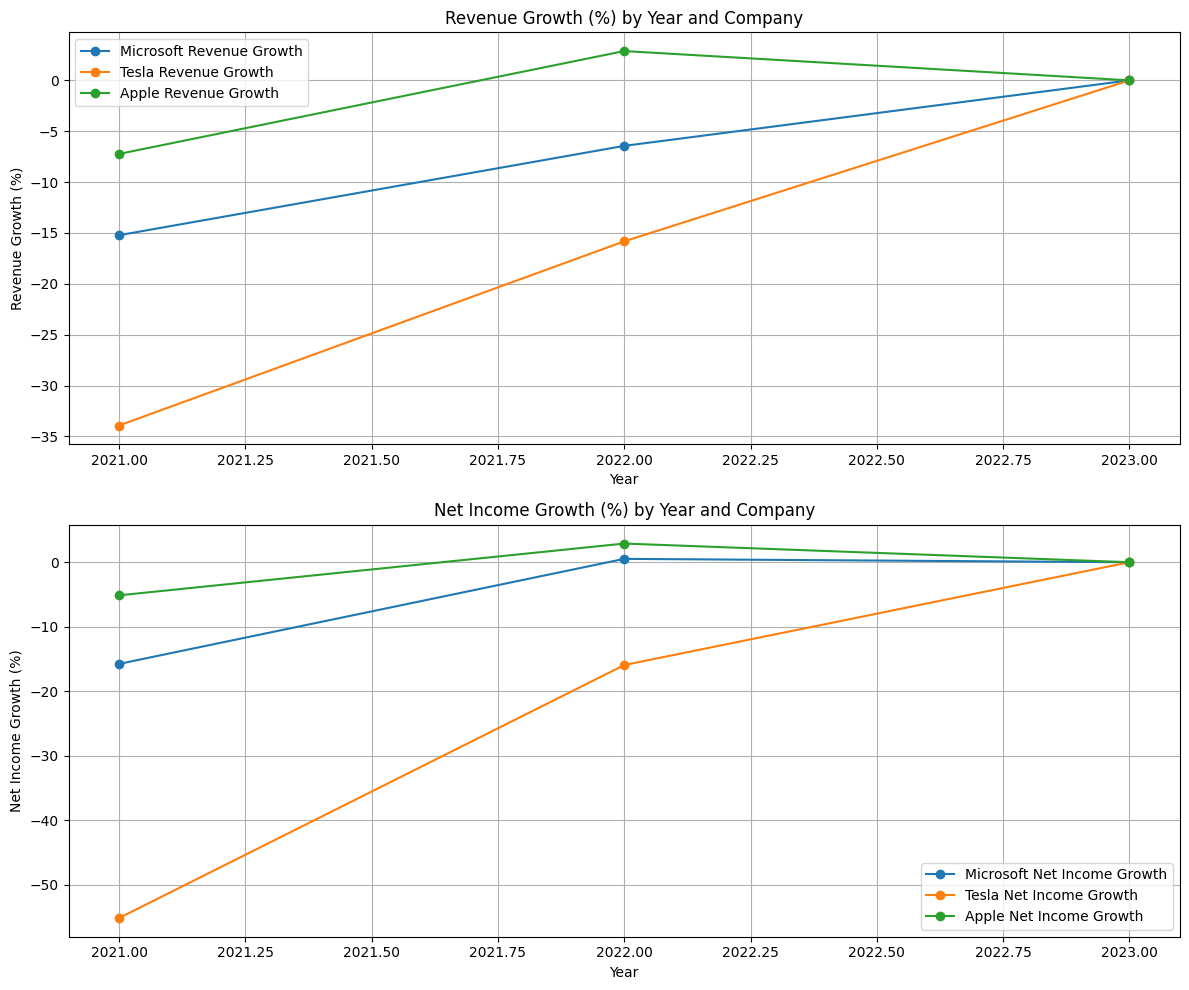

In [25]:
# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Plot Revenue Growth
for company in df['Company'].unique():
    company_df = df[df['Company'] == company]
    ax[0].plot(company_df['Year'], company_df['Revenue Growth (%)'], marker='o', label=f'{company} Revenue Growth')

ax[0].set_title('Revenue Growth (%) by Year and Company')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Revenue Growth (%)')
ax[0].legend()
ax[0].grid(True)

# Plot Net Income Growth
for company in df['Company'].unique():
    company_df = df[df['Company'] == company]
    ax[1].plot(company_df['Year'], company_df['Net Income Growth (%)'], marker='o', label=f'{company} Net Income Growth')

ax[1].set_title('Net Income Growth (%) by Year and Company')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Net Income Growth (%)')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

From 2021 to 2022, all three major technology and automotive companies—Apple, Microsoft, and Tesla—experienced an increase in their operational cash flow. This uptick suggests a period of robust financial health and operational efficiency for these companies, likely reflecting strong revenue performance, effective cost management, or both. This improvement in cash flow could be attributed to various factors such as successful product launches, increased market share, or enhanced operational strategies.

However, a noticeable decline in operational cash flow occurred for all three companies in 2023. This decrease indicates that, despite the positive growth trajectory observed in the previous year, these companies faced challenges that impacted their cash flow generation. Such challenges could include increased operational costs, supply chain disruptions, or significant capital expenditures that outpaced revenue growth.

Among the three, Microsoft experienced the least decrease in operational cash flow in 2023 compared to Apple and Tesla. This relatively smaller decline for Microsoft could imply better resilience or efficiency in managing cash flow under adverse conditions. It might also reflect strategic decisions that cushioned the impact of negative factors on cash flow.

Overall, the trends observed highlight the dynamic nature of operational performance in leading companies, underscoring the importance of ongoing adaptation and strategic planning. The initial positive growth followed by a decline in cash flow across the board indicates that while companies can experience periods of strong performance, they must continually navigate and address various internal and external challenges to sustain operational efficiency and financial health.

## Additional Feauter Engineering

In [26]:
df['Liabilities_to_Assets'] = df['Total Liabilities'] / df['Total Assets']
df['Net_Income_to_Revenue'] = df['Net Income'] / df['Total Revenue']

In [27]:
# Growth Rate
df['Revenue_Growth_Rate'] = df.groupby('Company')['Total Revenue'].pct_change().fillna(0)
df['Net_Income_Growth_Rate'] = df.groupby('Company')['Net Income'].pct_change().fillna(0)

In [28]:
# Rolling statistics
df['Revenue_Rolling_Mean'] = df.groupby('Company')['Total Revenue'].rolling(window=2).mean().reset_index(level=0, drop=True)
df['Revenue_Rolling_Std'] = df.groupby('Company')['Total Revenue'].rolling(window=2).std().reset_index(level=0, drop=True)
df['Net_Income_Rolling_Mean'] = df.groupby('Company')['Net Income'].rolling(window=2).mean().reset_index(level=0, drop=True)
df['Net_Income_Rolling_Std'] = df.groupby('Company')['Net Income'].rolling(window=2).std().reset_index(level=0, drop=True)

In [29]:
# Lagging Feature
df['Revenue_Lag_1'] = df.groupby('Company')['Total Revenue'].shift(1)
df['Net_Income_Lag_1'] = df.groupby('Company')['Net Income'].shift(1)

In [30]:
df

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow,Revenue Growth (%),Net Income Growth (%),Liabilities_to_Assets,Net_Income_to_Revenue,Revenue_Growth_Rate,Net_Income_Growth_Rate,Revenue_Rolling_Mean,Revenue_Rolling_Std,Net_Income_Rolling_Mean,Net_Income_Rolling_Std,Revenue_Lag_1,Net_Income_Lag_1
0,Microsoft,2023,211915000000,72361000000,411976000000,205753000000,87582000000,0.000000,0.000000,0.499430,0.341462,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,Microsoft,2022,198270000000,72738000000,364840000000,198298000000,89035000000,-6.438902,0.520999,0.543520,0.366863,-0.064389,0.005210,2.050925e+11,9.648472e+09,7.254950e+10,2.665793e+08,2.119150e+11,7.236100e+10
2,Microsoft,2021,168088000000,61271000000,333779000000,191791000000,76740000000,-15.222676,-15.764800,0.574605,0.364517,-0.152227,-0.157648,1.831790e+11,2.134190e+10,6.700450e+10,8.108393e+09,1.982700e+11,7.273800e+10
3,Tesla,2023,96773000000,14974000000,106618000000,43009000000,13256000000,0.000000,0.000000,0.403393,0.154733,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
4,Tesla,2022,81462000000,12587000000,82338000000,36440000000,14724000000,-15.821562,-15.940964,0.442566,0.154514,-0.158216,-0.159410,8.911750e+10,1.082651e+10,1.378050e+10,1.687864e+09,9.677300e+10,1.497400e+10
5,Tesla,2021,53823000000,5644000000,62131000000,30548000000,11497000000,-33.928703,-55.160086,0.491671,0.104862,-0.339287,-0.551601,6.764250e+10,1.954372e+10,9.115500e+09,4.909442e+09,8.146200e+10,1.258700e+10
6,Apple,2023,383285000000,96995000000,352583000000,290437000000,110543000000,0.000000,0.000000,0.823741,0.253062,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
7,Apple,2022,394328000000,99803000000,352755000000,302083000000,122151000000,2.881146,2.894995,0.856354,0.253096,0.028811,0.028950,3.888065e+11,7.808580e+09,9.839900e+10,1.985556e+09,3.832850e+11,9.699500e+10
8,Apple,2021,365817000000,94680000000,351022000000,287912000000,104038000000,-7.230275,-5.133112,0.820211,0.258818,-0.072303,-0.051331,3.800725e+11,2.016032e+10,9.724150e+10,3.622508e+09,3.943280e+11,9.980300e+10
